# Auswertung Versuch 234

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from tabulate import tabulate

# Himmelsmessungen

### Import & Formatierung der Messungen

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',', '.'))

In [3]:
# Import der Daten der Messung ohne Fenster
lamb_og, inten_og = np.loadtxt('./data/Himmel ohne Fenster.txt', skiprows=14, 
                              converters={0:comma_to_float, 1:comma_to_float},
                              comments='>', unpack=True)

In [4]:
# Import der Daten der Messung mit Fenster
lamb_mg, inten_mg = np.loadtxt('./data/Himmel mit Fenster.txt', skiprows=14, 
                              converters={0:comma_to_float, 1:comma_to_float},
                              comments='>', unpack=True)

### Vergleich der Spektren

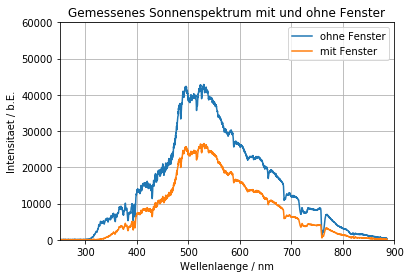

In [5]:
plt.plot(lamb_og, inten_og, label='ohne Fenster')
plt.plot(lamb_mg, inten_mg, label='mit Fenster')
plt.title('Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig("./output/Himmel_m_o_G.pdf", format="pdf")

### Absorption vom Glas

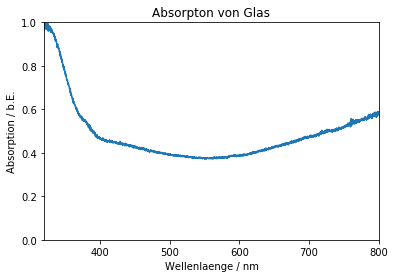

In [6]:
A=1-inten_mg/inten_og

plt.plot(lamb_mg, A)
plt.title('Absorpton von Glas')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Absorption / b.E.')
plt.ylim((0,1))
plt.xlim((320,800))
plt.savefig("./output/Absorption_Glas.pdf", format="pdf")

### Fraunhofer Linien

(250, 900)

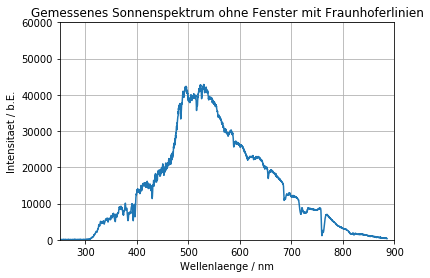

In [7]:
plt.plot(lamb_og, inten_og)
plt.title('Gemessenes Sonnenspektrum ohne Fenster mit Fraunhoferlinien')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))

In [8]:
balmer=np.array([655.1, 485.2, 433.4, 409.7])
balmererr=np.array([0.5, 0.5, 0.5, 0.5])
fraunh=np.array([759.3, 686.0, 588.2, 525.8, 515.9, 429.8, 396.5, 393.0])
fraunherr=np.array([0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5])

litbalmer=np.array([656.3, 486.1, 434.0, 410.1])
litfraunh=np.array([759.4, 686.7, 587.6, 527.0, 518.4, 430.8, 396.8, 393.4])

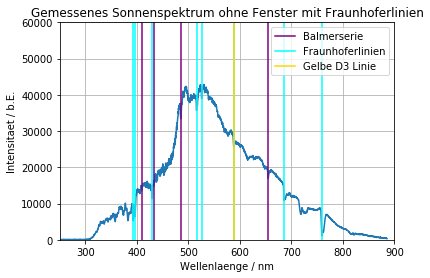

In [9]:
plt.plot(lamb_og, inten_og)
plt.title('Gemessenes Sonnenspektrum ohne Fenster mit Fraunhoferlinien')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
for i in range(0, len(balmer)-1):
    plt.axvline(x=balmer[i], color='purple')
plt.axvline(x=balmer[3], color='purple', label='Balmerserie')
for i in range(0, len(fraunh)-1):
    plt.axvline(x=fraunh[i], color='cyan')
plt.axvline(x=fraunh[7], color='cyan', label='Fraunhoferlinien')
plt.axvline(x=fraunh[2], color='gold', label='Gelbe D3 Linie')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig("./output/Fraunhoferlinien.pdf", format="pdf")

In [10]:
#Signifikanztest
sigmaBalmer = abs(balmer-litbalmer) / balmererr
sigmaFraunh = abs(fraunh-litfraunh) / fraunherr
print(sigmaBalmer)
print(sigmaFraunh)

[2.4 1.8 1.2 0.8]
[0.2 1.4 1.2 1.2 2.5 2.  0.6 0.8]


# Natriumspektrum

### Bereich: 400 - 540nm

In [11]:
lamb_low_full, inten_low_full=np.loadtxt('./data/400-540 full.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)

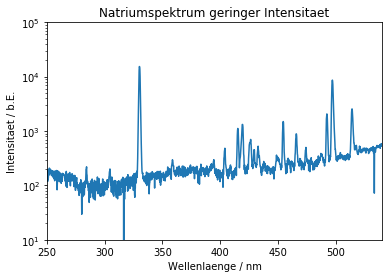

In [12]:
#%matplotlib ipympl
plt.plot(lamb_low_full, inten_low_full)
plt.title('Natriumspektrum geringer Intensitaet')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((10,100000))
plt.xlim((250,540))
plt.savefig("./output/NA_low_full.pdf", format="pdf")

In [13]:
#Gemessene Linien:
NaLow=np.array([284.2, 304.3, 329.8, 404.0, 415.2, 419.2, 426.2, 429.3, 432.8, 449, 454.4, 465.8, 474.2, 492.2, 496.9, 514.1, 517.3])
NaLowErr=np.array([0.6, 0.9, 1.5, 0.5, 0.7, 1.0, 1.2, 0.5, 1.0, 3, 0.7, 1.0, 0.7, 1.0, 1.7, 1.3, 1.0])

### Bereich: D-Linie

In [14]:
lamb_d_full, inten_d_full=np.loadtxt('./data/natrium d linie full.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)

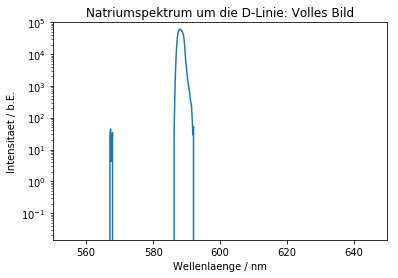

In [44]:
plt.plot(lamb_d_full, inten_d_full)
plt.title('Natriumspektrum um die D-Linie: Volles Bild')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((0,100000))
plt.xlim((550,650))
plt.savefig("./output/NA_D_full.pdf", format="pdf")

In [16]:
#gemessene Linien
NaDFull=np.array([567.2, 588])
NaDFullErr=np.array([0.6, 5])

---

In [17]:
lamb_d_zoom, inten_d_zoom=np.loadtxt('./data/natrium d linie zoom.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)

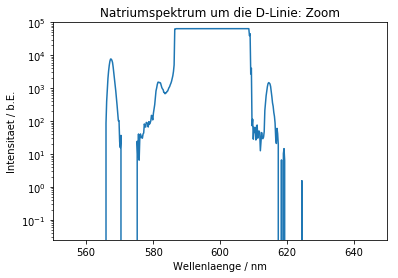

In [18]:
plt.plot(lamb_d_zoom, inten_d_zoom)
plt.title('Natriumspektrum um die D-Linie: Zoom')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((0,100000))
plt.xlim((550,650))
plt.savefig("./output/NA_D_zoom.pdf", format="pdf")

In [19]:
#gemessene Linien
NaDZoom=np.array([567, 614.5])
NaDZoomErr=np.array([3, 1.3])

### Bereich: 650 - 800nm

In [20]:
lamb_high, inten_high=np.loadtxt('./data/natrium 650-850.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)

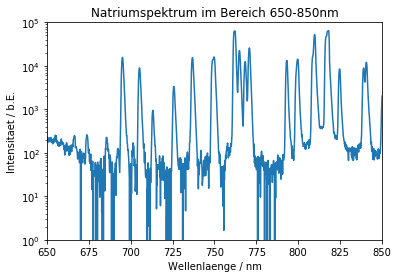

In [21]:
plt.plot(lamb_high, inten_high)
plt.title('Natriumspektrum im Bereich 650-850nm')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((1,100000))
plt.xlim((650,850))
plt.savefig("./output/NA_high.pdf", format="pdf")

In [22]:
#gemessene Linien
NaHigh=np.array([694.9, 705.0, 713.1, 725.6, 736.6, 749.4, 761.7, 764.8, 768.2, 770.8, 793.2, 799.6, 809.7, 817.9, 824.5, 839.0, 840.7])
NaHighErr=np.array([2.0, 1.8, 1.2, 1.4, 2.0, 1.7, 1.2, 1.0, 0.8, 1.3, 1.2, 1.5, 2.0, 2.2, 0.8, 1.2, 1.3])

---

### Erwartete Linien 1.NS

In [23]:
#Berechnung von E_3p
#Verwende gemessene Linie NaHigh[13] = 817,9 und m=3
E_Ry = -13.605 #eV
hc = 1.2398 * 10**3 #nm eV
E_3p = (E_Ry / 9) - (hc / 817.9)
#Fehler:
dE_3p = (hc / 817.9**2) * NaHighErr[13]
print(E_3p, dE_3p)

-3.027499898113054 0.0040773115407532114


In [24]:
NS1 = [] #Array, in dem alle erwarteten Linien mit Qunatenzahl und Fehler gespeichert Werden
NS1l = [] #Array mit nur den Linien
NS1lErr = [] #Array mit nur den Fehlern
for m in range(3,13):
    l=1.2398E3/(-13.605/m**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))
    dl = abs(1.2398E3/((-13.605/m**2-E_3p)**2) * dE_3p)
    a = (m, round(l, 2), round(dl, 2))
    NS1.append(a)
    NS1l.append(l)
    NS1lErr.append(dl)

m= 3, lambda=817.90
m= 4, lambda=569.45
m= 5, lambda=499.26
m= 6, lambda=467.92
m= 7, lambda=450.86
m= 8, lambda=440.44
m= 9, lambda=433.57
m=10, lambda=428.78
m=11, lambda=425.31
m=12, lambda=422.70


In [25]:
print(tabulate(NS1, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{rrr}
\hline
  3 & 817.90 & 2.20 \\
  4 & 569.45 & 1.07 \\
  5 & 499.26 & 0.82 \\
  6 & 467.92 & 0.72 \\
  7 & 450.86 & 0.67 \\
  8 & 440.44 & 0.64 \\
  9 & 433.57 & 0.62 \\
 10 & 428.78 & 0.60 \\
 11 & 425.31 & 0.59 \\
 12 & 422.70 & 0.59 \\
\hline
\end{tabular}


In [26]:
#Zugeordnete Linien
NS1zug = np.array([817.9, 567, 496.9, 465.8, 449, 999, 432.8, 429.3, 426.2, 999]) #Eiträge '999' stehen für nicht zuordbare Linien
NS1zugErr = np.array([2.2, 3, 1.7, 1.0, 3, 0, 1.0, 0.5, 1.2, 0])

#Signifikanztest:
SignNS1 = []
for i in range(0, len(NS1l)):
    a  = abs(NS1l[i] - NS1zug[i]) / (np.sqrt(NS1lErr[i]**2 + NS1zugErr[i]**2))
    SignNS1.append(a)
print(SignNS1)

[0.0, 0.7695859513727448, 1.247829841684202, 1.7225498848940328, 0.6056368808730319, 875.5442670581631, 0.6521456633760835, 0.6609517706768887, 0.6657695062171897, 980.7317565116002]


### Erwartete Lininen 2. NS

In [27]:
#Bindungsenergie Grundzustand
E_3s = E_3p - (hc / 589)
dE_3s = dE_3p
#Korrekturfaktor Delta_s
Delta_s = 3 - np.sqrt(E_Ry / E_3s)
dDelta_s = 0.5 * np.sqrt(E_Ry / E_3s**3) * dE_3s

print(E_3s, dE_3s)
print(Delta_s, dDelta_s)

-5.132423497433937 0.0040773115407532114
1.371873928666396 0.000646709807147509


In [28]:
NS2 = []
NS2l = []
NS2lErr = []
for m in range(4,10):
    l=1.2398E3/(-13.605/(m-Delta_s)**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))
    dl = np.sqrt(((1.2398E3/((-13.605/(m-Delta_s)**2 - E_3p))**2) * dE_3p)**2 + 
                 (2 * 1.2398E3 * (-13.605) * dDelta_s * (m-Delta_s)/(((-13.605 - E_3p * (m-Delta_s)**2))**2))**2)
    a = (m, round(l, 2), round(dl, 2))
    NS2.append(a)
    NS2l.append(l)
    NS2lErr.append(dl)

m= 4, lambda=1172.09
m= 5, lambda=621.78
m= 6, lambda=518.24
m= 7, lambda=477.21
m= 8, lambda=456.17
m= 9, lambda=443.79


In [29]:
print(tabulate(NS2, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{rrr}
\hline
 4 & 1172.09 & 4.64 \\
 5 &  621.78 & 1.28 \\
 6 &  518.24 & 0.88 \\
 7 &  477.21 & 0.75 \\
 8 &  456.17 & 0.68 \\
 9 &  443.79 & 0.65 \\
\hline
\end{tabular}


In [30]:
#Zugeordnete Linien
NS2zug = np.array([999, 614.5, 517.3, 474.2, 454.4, 999]) #Eiträge '999' stehen für nicht zuordbare Linien
NS2zugErr = np.array([0, 1.3, 1.0, 0.7, 0.7, 0])

#Signifikanztest:
SignNS2 = []
for i in range(0, len(NS2l)):
    a  = abs(NS2l[i] - NS2zug[i]) / (np.sqrt(NS2lErr[i]**2 + NS2zugErr[i]**2))
    SignNS2.append(a)
print(SignNS2)

[37.271791138414365, 3.9969940460289646, 0.7034891247107137, 2.9402675495457427, 1.8129757341565915, 857.177845167591]


### Erwartete Linien HS

In [31]:
#Korrekturfaktor Delta_p
Delta_p = 3 - np.sqrt(E_Ry / E_3p)
dDelta_p = 0.5 * np.sqrt(E_Ry / E_3p**3) * dE_3p

print(Delta_p, dDelta_p)

0.8801398813843408 0.0014274699285376057


In [32]:
HS = []
HSl = []
HSlErr = []
for m in range(4,6):
    l=1.2398E3/(-13.605/(m-Delta_p)**2 - E_3s)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))
    dl = np.sqrt(((1.2398E3/((-13.605/(m-Delta_p)**2 - E_3s))**2) * dE_3s)**2 + 
                 (2 * 1.2398E3 * (-13.605) * dDelta_p * (m-Delta_p)/(((-13.605 - E_3s * (m-Delta_p)**2))**2))**2)
    a = (m, round(l, 2), round(dl, 2))
    HS.append(a)
    HSl.append(l)
    HSlErr.append(dl)

m= 4, lambda=331.97
m= 5, lambda=286.27


In [33]:
print(tabulate(HS, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{rrr}
\hline
 4 & 331.97 & 0.38 \\
 5 & 286.27 & 0.27 \\
\hline
\end{tabular}


In [34]:
#Zugeordnete Linien
HSzug = np.array([329.8, 284.2]) 
HSzugErr = np.array([1.5, 0.6])

#Signifikanztest:
SignHS = []
for i in range(0, len(HSl)):
    a  = abs(HSl[i] - HSzug[i]) / (np.sqrt(HSlErr[i]**2 + HSzugErr[i]**2))
    SignHS.append(a)
print(SignHS)

[1.402255655540772, 3.143046635536093]


---

### Bestimmung der Serienenergien und der l-abhängigen Korrekturfaktoren

In [35]:
#Quantenzahl Arrays:
NS1QZ = np.arange(3, 13)
NS2QZ = np.arange(4, 10)

#Entferne nicht zugeordnete Wellenlängen:
indexNS1 = [5, 9]
NS1QZ_ = np.delete(NS1QZ, indexNS1)
NS1zug_ = np.delete(NS1zug, indexNS1)
NS1zugErr_ = np.delete(NS1zugErr, indexNS1)

indexNS2 = [0, 5]
NS2QZ_ = np.delete(NS2QZ, indexNS2)
NS2zug_ = np.delete(NS2zug, indexNS2)
NS2zugErr_ = np.delete(NS2zugErr, indexNS2)

---

Text(0.5, 1.0, '1. Nebenserie des Na-Atoms')

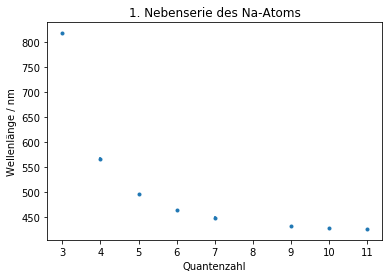

In [36]:
# 1. Nebenserie
plt.errorbar(NS1QZ_, NS1zug_, NS1zugErr_, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('1. Nebenserie des Na-Atoms')

E_Ry= -12.174088916181468 , Standardfehler= 0.2803851245600611
E_3p= -3.0147994153871127 , Standardfehler= 0.0032031095846340937
D_d= 0.1503829554125808 , Standardfehler= 0.030526636698724883
chi2= 1.5970817193050355
chi2_red= 0.3194163438610071
Wahrscheinlichkeit: 90.0 %


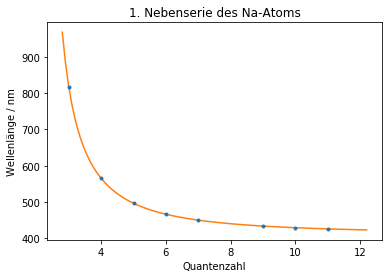

In [37]:
#Definiere Fitfunktion:
def fit_funcNS1(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

#Fit:
para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_funcNS1, NS1QZ_, NS1zug_, sigma=NS1zugErr_ ,p0=para)

#Ausgabe:
print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))

fits1 = np.array([popt[0], popt[1], popt[2]])
dfits1 = np.array([np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2])])

#Güte des Fits:
chi2_=np.sum((fit_funcNS1(NS1QZ_,*popt)-NS1zug_)**2/NS1zugErr_**2)
dof=len(NS1QZ_)-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

#Fitwahrscheinlichkeit:
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

#Plot des Fits:
plt.errorbar(NS1QZ_,NS1zug_,NS1zugErr_, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2, 100)
plt.plot(x, fit_funcNS1(x,*popt))
plt.savefig("output/NS1_fit.pdf", format="pdf")

In [38]:
#Arrays mit vorherigen Werten von Oben (1.NS)
werte1 = np.array([E_Ry, E_3p, 0]) 
dwerte1 = np.array([0, dE_3p, 0])

#Signifikanztest
SignFit1 = []
for i in range(0, len(werte1)):
    a  = abs(werte1[i] - fits1[i]) / (np.sqrt(dwerte1[i]**2 + dfits1[i]**2))
    SignFit1.append(a)
print(SignFit1)

[5.103377313841834, 2.449459212500005, 4.926286406745306]


---

Text(0.5, 1.0, '2. Nebenserie des Na-Atoms')

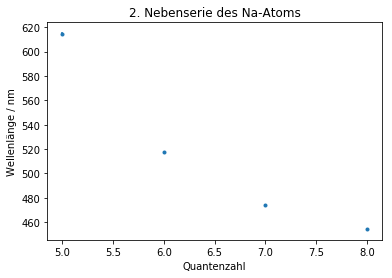

In [39]:
# 2. Nebenserie
plt.errorbar(NS2QZ_, NS2zug_, NS2zugErr_, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('2. Nebenserie des Na-Atoms')

E_Ry= -15.983793260146998 , Standardfehler= 3.7763275744024076
E_3p= -3.0677424492262095 , Standardfehler= 0.04874524155986873
D_s= 1.1001660083796412 , Standardfehler= 0.37724577768421824
chi2= 4.460469180301559
chi2_red= 4.460469180301559
Wahrscheinlichkeit: 3.0 %


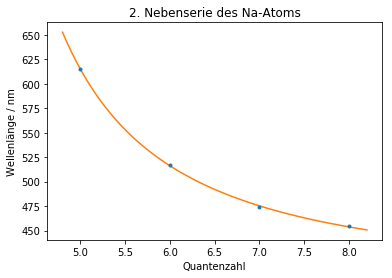

In [40]:
#Definiere Fitfunktion:
def fit_funcNS2(m,E_Ry,E_3p,D_s):
    return 1.2398E3/(E_Ry/(m-D_s)**2-E_3p)

#Fit:
para = [-13.6,-3,1.3]
popt2, pcov2 = curve_fit(fit_funcNS2, NS2QZ_, NS2zug_, sigma=NS2zugErr_ ,p0=para)

#Ausgabe:
print("E_Ry=",popt2[0], ", Standardfehler=", np.sqrt(pcov2[0][0]))
print("E_3p=",popt2[1], ", Standardfehler=", np.sqrt(pcov2[1][1]))
print("D_s=",popt2[2], ", Standardfehler=", np.sqrt(pcov2[2][2]))

fits2 = np.array([popt2[0], popt2[1], popt2[2]])
dfits2 = np.array([np.sqrt(pcov2[0][0]), np.sqrt(pcov2[1][1]), np.sqrt(pcov2[2][2])])

#Güte des Fits:
chi2_2=np.sum((fit_funcNS2(NS2QZ_,*popt2)-NS2zug_)**2/NS2zugErr_**2)
dof2=len(NS2QZ_)-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red2=chi2_2/dof2
print("chi2=", chi2_2)
print("chi2_red=",chi2_red2)

#Fitwahrscheinlichkeit:
prob=round(1-chi2.cdf(chi2_2,dof2),2)*100
print("Wahrscheinlichkeit:", prob,"%")

#Plot des Fits:
plt.errorbar(NS2QZ_,NS2zug_,NS2zugErr_, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('2. Nebenserie des Na-Atoms')
x=np.linspace(4.8,8.2, 100)
plt.plot(x, fit_funcNS2(x,*popt2))
plt.savefig("output/NS2_fit.pdf", format="pdf")

In [41]:
#Arrays mit vorherigen Werten von Oben (1.NS)
werte2 = np.array([E_Ry, E_3p, Delta_s]) 
dwerte2 = np.array([0, dE_3p, dDelta_s])

#Signifikanztest
SignFit2 = []
for i in range(0, len(werte2)):
    a  = abs(werte2[i] - fits2[i]) / (np.sqrt(dwerte2[i]**2 + dfits2[i]**2))
    SignFit2.append(a)
print(SignFit2)

[0.6299223818059358, 0.8226958152229904, 0.7202400586372499]


# Vergleich der Spektren

In [42]:
lamb_energiespar, inten_energiespar=np.loadtxt('./data/energiesparlampe.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)
lamb_gelb, inten_gelb=np.loadtxt('./data/gelbe led.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)
lamb_glüh, inten_glüh=np.loadtxt('./data/glühlampe.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)
lamb_grün, inten_grün=np.loadtxt('./data/grüner laser.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)
lamb_rot, inten_rot=np.loadtxt('./data/rote led.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)
lamb_weiß, inten_weiß=np.loadtxt('./data/weiße led.txt', skiprows=14, 
                             converters= {0:comma_to_float, 1:comma_to_float}, 
                             comments='>', unpack=True)

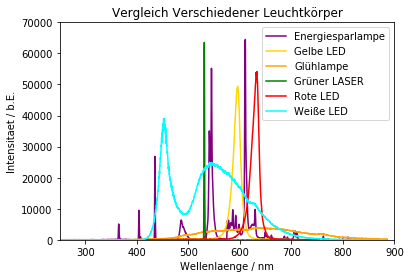

In [43]:
plt.plot(lamb_energiespar, inten_energiespar, color='purple', label='Energiesparlampe')
plt.plot(lamb_gelb, inten_gelb, color='gold', label='Gelbe LED')
plt.plot(lamb_glüh, inten_glüh, color='orange', label='Glühlampe')
plt.plot(lamb_grün, inten_grün, color='green', label='Grüner LASER')
plt.plot(lamb_rot, inten_rot, color='red', label='Rote LED')
plt.plot(lamb_weiß, inten_weiß, color='cyan', label='Weiße LED')
plt.legend()
plt.title('Vergleich Verschiedener Leuchtkörper')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.ylim((0,70000))
plt.xlim((250,900))
plt.savefig("./output/Leuchtkörper.pdf", format="pdf")